In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer

In [2]:
df = pd.read_csv("Plane Price.csv")

In [3]:
df.head()

,Model Name,Engine_Type,HP or lbs thr ea engine,Max speed Knots,Rcmnd cruise Knots,Stall Knots dirty,Fuel gal/lbs,All eng rate of climb,Eng out rate of climb,Takeoff over 50ft,Landing over 50ft,Empty weight lbs,Length ft/in,Wing span ft/in,Range N.M.,Price
0,100 Darter (S.L. Industries),Piston,145,104,91,46,36,450,900,1300,"2,050","1,180",25/3,37/5,370,1300000
1,7 CCM Champ,Piston,85,89,83,44,15,600,720,800,"1,350",820,20/7,36/1,190,1230000
2,100 Darter (S.L. Industries),Piston,90,90,78,37,19,650,475,850,"1,300",810,21/5,35/0,210,1600000
3,7 AC Champ,Piston,85,88,78,37,19,620,500,850,"1,300",800,21/5,35/0,210,1300000
4,100 Darter (S.L. Industries),Piston,65,83,74,33,14,370,632,885,"1,220",740,21/5,35/0,175,1250000


In [4]:
df.isnull().any()


Model Name                 False
Engine_Type                False
HP or lbs thr ea engine    False
Max speed Knots            False
Rcmnd cruise Knots         False
Stall Knots dirty          False
Fuel gal/lbs               False
All eng rate of climb      False
Eng out rate of climb      False
Takeoff over 50ft          False
Landing over 50ft          False
Empty weight lbs           False
Length ft/in               False
Wing span ft/in            False
Range N.M.                 False
Price                      False
dtype: bool

In [5]:
df['Wing span ft/in'].str.split(pat ='/')

0      [37, 5]
1      [36, 1]
2      [35, 0]
3      [35, 0]
4      [35, 0]
        ...   
512    [47, 8]
513    [47, 8]
514    [47, 8]
515    [42, 8]
516    [42, 8]
Name: Wing span ft/in, Length: 517, dtype: object

In [6]:
df['Wing_span(ft)'] = df['Wing span ft/in'].str.split(pat ='/').str[0]
df['Wing_span(in)'] = df['Wing span ft/in'].str.split(pat ='/').str[1]

In [7]:
df['Length ft/in'].str.split(pat ='/')

0      [25, 3]
1      [20, 7]
2      [21, 5]
3      [21, 5]
4      [21, 5]
        ...   
512    [43, 5]
513    [43, 5]
514    [43, 5]
515    [36, 8]
516    [34, 8]
Name: Length ft/in, Length: 517, dtype: object

In [8]:
df['Length(ft)'] = df['Length ft/in'].str.split(pat ='/').str[0]
df['Length(in)'] = df['Length ft/in'].str.split(pat ='/').str[1]

In [9]:
df.drop(['Wing span ft/in', 'Length ft/in'], inplace = True, axis = 1)

In [10]:
df['Range N.M.']=df['Range N.M.'].str.replace(',','')
df['Empty weight lbs']=df['Empty weight lbs'].str.replace(',','')
df['Landing over 50ft']=df['Landing over 50ft'].str.replace(',','')
df['All eng rate of climb']=df['All eng rate of climb'].str.replace(',','')

df['HP or lbs thr ea engine']=df['HP or lbs thr ea engine'].str.replace(',','')

In [11]:
df.head()

,Model Name,Engine_Type,HP or lbs thr ea engine,Max speed Knots,Rcmnd cruise Knots,Stall Knots dirty,Fuel gal/lbs,All eng rate of climb,Eng out rate of climb,Takeoff over 50ft,Landing over 50ft,Empty weight lbs,Range N.M.,Price,Wing_span(ft),Wing_span(in),Length(ft),Length(in)
0,100 Darter (S.L. Industries),Piston,145,104,91,46,36,450,900,1300,2050,1180,370,1300000,37,5,25,3
1,7 CCM Champ,Piston,85,89,83,44,15,600,720,800,1350,820,190,1230000,36,1,20,7
2,100 Darter (S.L. Industries),Piston,90,90,78,37,19,650,475,850,1300,810,210,1600000,35,0,21,5
3,7 AC Champ,Piston,85,88,78,37,19,620,500,850,1300,800,210,1300000,35,0,21,5
4,100 Darter (S.L. Industries),Piston,65,83,74,33,14,370,632,885,1220,740,175,1250000,35,0,21,5


In [12]:
df.isnull().any()

Model Name                 False
Engine_Type                False
HP or lbs thr ea engine    False
Max speed Knots            False
Rcmnd cruise Knots         False
Stall Knots dirty          False
Fuel gal/lbs               False
All eng rate of climb      False
Eng out rate of climb      False
Takeoff over 50ft          False
Landing over 50ft          False
Empty weight lbs           False
Range N.M.                 False
Price                      False
Wing_span(ft)              False
Wing_span(in)              False
Length(ft)                 False
Length(in)                 False
dtype: bool

In [13]:
df.drop(['Model Name','Landing over 50ft'], inplace = True, axis = 1)

In [14]:
df.dtypes

Engine_Type                object
HP or lbs thr ea engine    object
Max speed Knots             int64
Rcmnd cruise Knots          int64
Stall Knots dirty           int64
Fuel gal/lbs                int64
All eng rate of climb      object
Eng out rate of climb       int64
Takeoff over 50ft           int64
Empty weight lbs           object
Range N.M.                 object
Price                       int64
Wing_span(ft)              object
Wing_span(in)              object
Length(ft)                 object
Length(in)                 object
dtype: object

In [15]:
df["HP or lbs thr ea engine"] =  df["HP or lbs thr ea engine"].astype('float')
df["All eng rate of climb"] =  df["All eng rate of climb"].astype('int')

df["Empty weight lbs"] =  df["Empty weight lbs"].astype('int')
df["Range N.M."] =  df["Range N.M."].astype('int')
df["Wing_span(ft)"] =  df["Wing_span(ft)"].astype('int')
df["Wing_span(in)"] =  df["Wing_span(in)"].astype('int')
df["Length(in)"] =  df["Length(in)"].astype('int')
df["Length(ft)"] =  df["Length(ft)"].astype('int')

In [16]:
df.dtypes

Engine_Type                 object
HP or lbs thr ea engine    float64
Max speed Knots              int64
Rcmnd cruise Knots           int64
Stall Knots dirty            int64
Fuel gal/lbs                 int64
All eng rate of climb        int32
Eng out rate of climb        int64
Takeoff over 50ft            int64
Empty weight lbs             int32
Range N.M.                   int32
Price                        int64
Wing_span(ft)                int32
Wing_span(in)                int32
Length(ft)                   int32
Length(in)                   int32
dtype: object

C:\Users\user\AppData\Local\Temp\ipykernel_4920\4073844684.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,cmap = 'cool')


<Axes: >

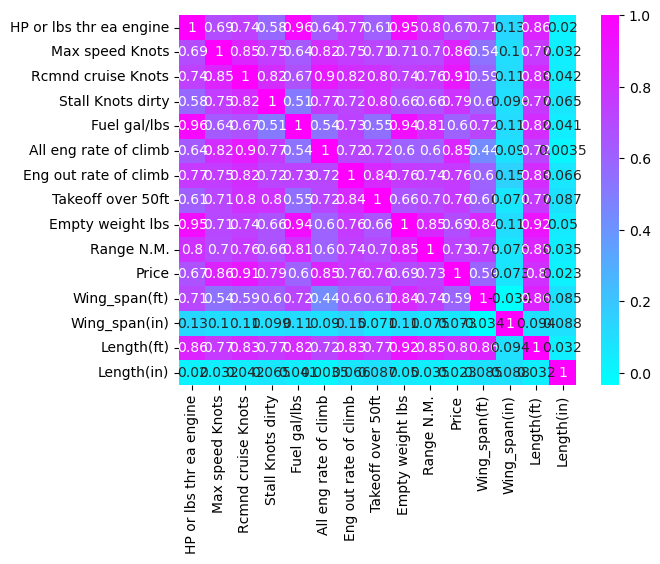

In [17]:
sns.heatmap(df.corr(),annot=True,cmap = 'cool')

In [18]:
df.drop(['Wing_span(in)', 'Length(in)'], inplace = True, axis = 1)

C:\Users\user\AppData\Local\Temp\ipykernel_4920\4073844684.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,cmap = 'cool')


<Axes: >

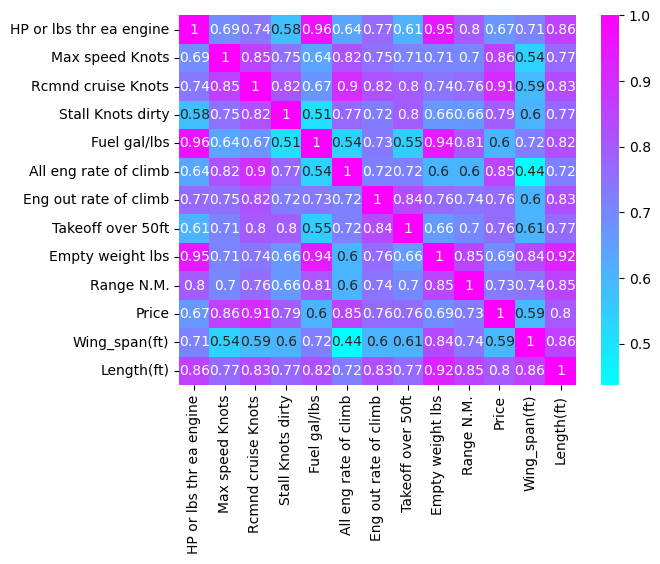

In [19]:
sns.heatmap(df.corr(),annot=True,cmap = 'cool')

In [20]:
df.head()

,Engine_Type,HP or lbs thr ea engine,Max speed Knots,Rcmnd cruise Knots,Stall Knots dirty,Fuel gal/lbs,All eng rate of climb,Eng out rate of climb,Takeoff over 50ft,Empty weight lbs,Range N.M.,Price,Wing_span(ft),Length(ft)
0,Piston,145.0,104,91,46,36,450,900,1300,1180,370,1300000,37,25
1,Piston,85.0,89,83,44,15,600,720,800,820,190,1230000,36,20
2,Piston,90.0,90,78,37,19,650,475,850,810,210,1600000,35,21
3,Piston,85.0,88,78,37,19,620,500,850,800,210,1300000,35,21
4,Piston,65.0,83,74,33,14,370,632,885,740,175,1250000,35,21


C:\Users\user\AppData\Local\Temp\ipykernel_4920\2200146726.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Fuel gal/lbs'])


<Axes: xlabel='Fuel gal/lbs', ylabel='Density'>

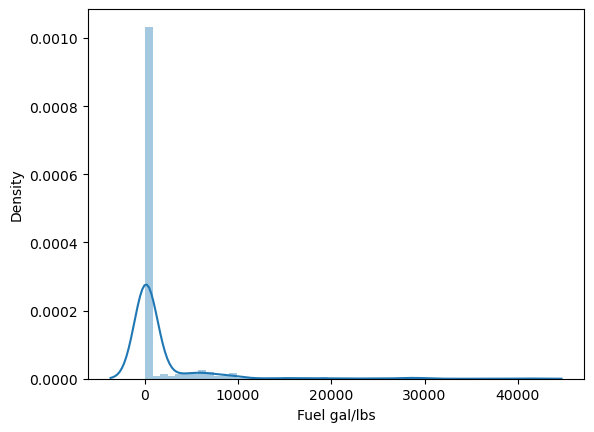

In [21]:
sns.distplot(df['Fuel gal/lbs'])

<Axes: >

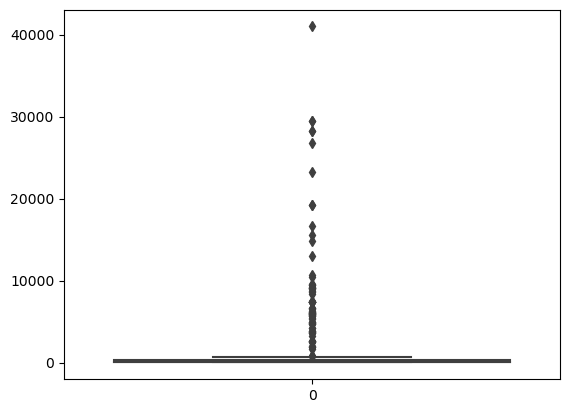

In [22]:
sns.boxplot(df['Fuel gal/lbs'])

<Axes: >

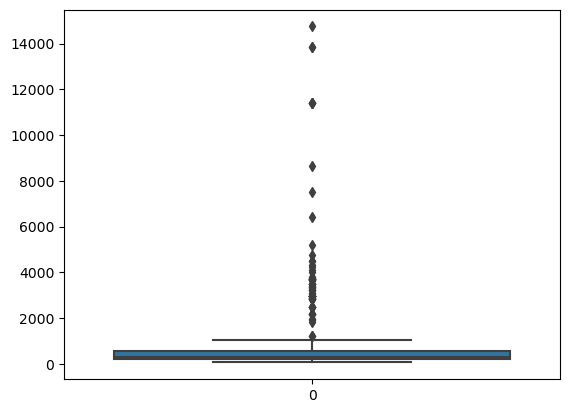

In [23]:
sns.boxplot(df['HP or lbs thr ea engine'])

<Axes: >

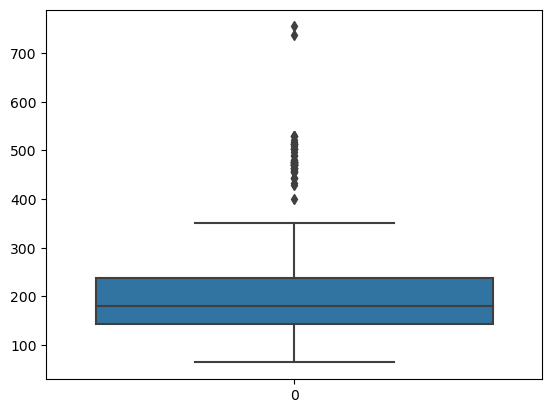

In [24]:
sns.boxplot(df['Max speed Knots'])

<Axes: >

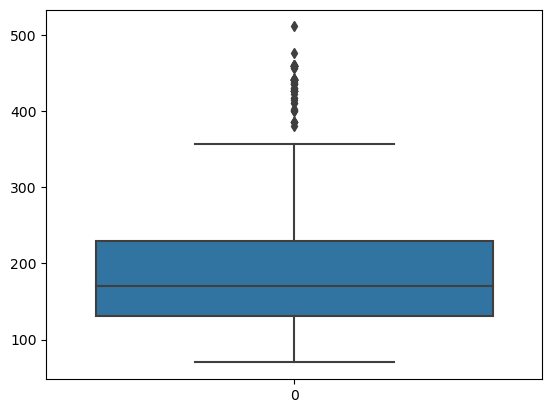

In [25]:
sns.boxplot(df['Rcmnd cruise Knots'])

<Axes: >

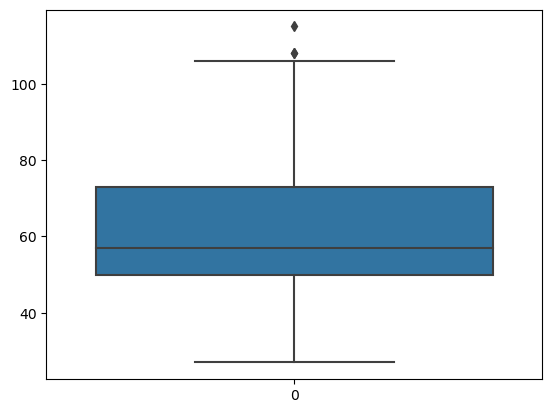

In [26]:
sns.boxplot(df['Stall Knots dirty'])

<Axes: >

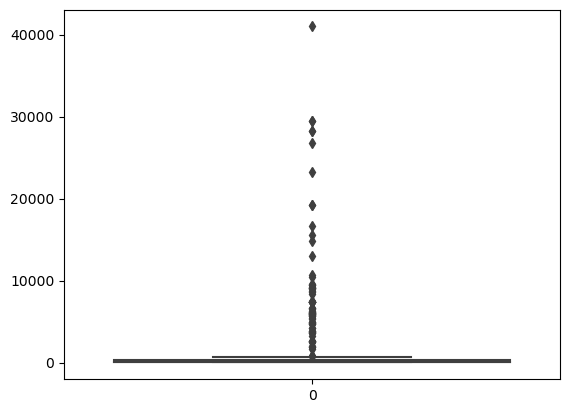

In [27]:
sns.boxplot(df['Fuel gal/lbs'])

<Axes: >

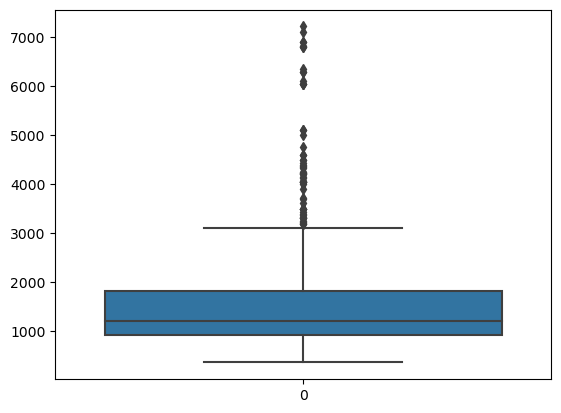

In [28]:
sns.boxplot(df['All eng rate of climb'])

<Axes: >

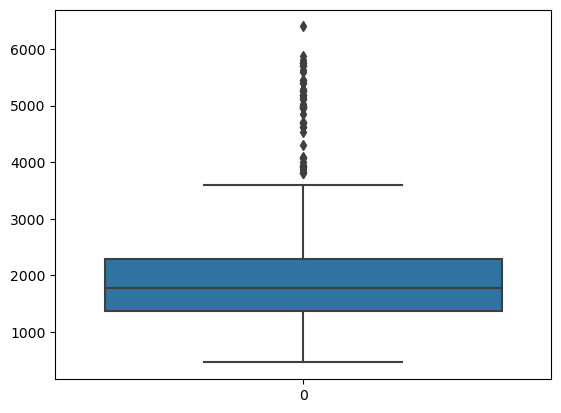

In [29]:
sns.boxplot(df['Eng out rate of climb'])

<Axes: >

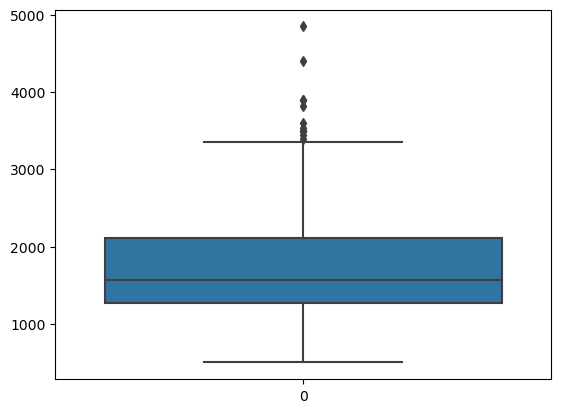

In [30]:
sns.boxplot(df['Takeoff over 50ft'])

<Axes: >

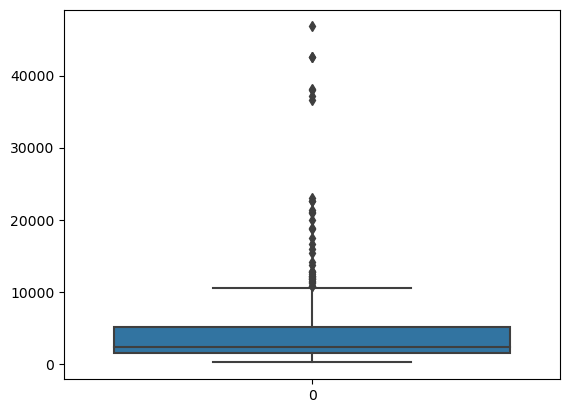

In [31]:
sns.boxplot(df['Empty weight lbs'])

<Axes: >

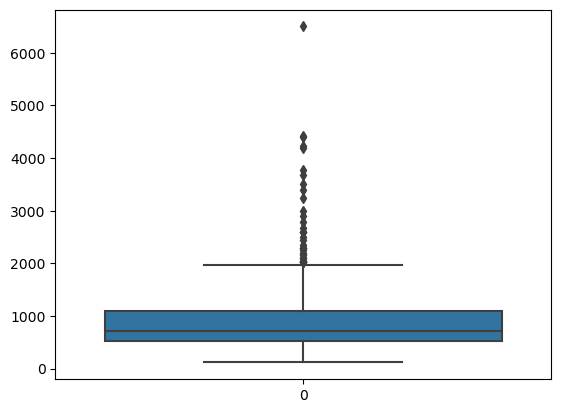

In [32]:
sns.boxplot(df['Range N.M.'])

<Axes: >

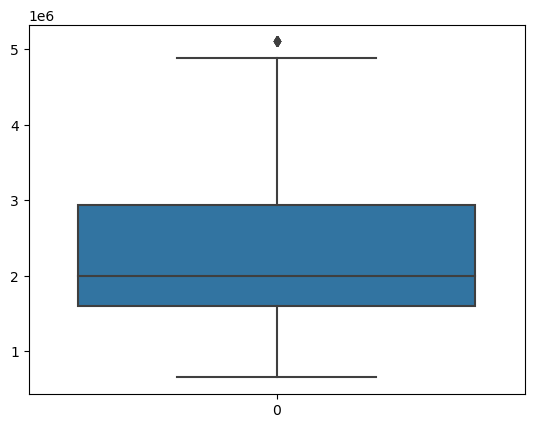

In [33]:
sns.boxplot(df['Price'])

<Axes: >

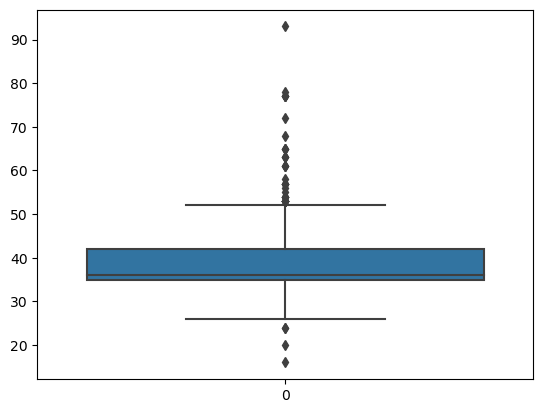

In [34]:
sns.boxplot(df['Wing_span(ft)'])

<Axes: >

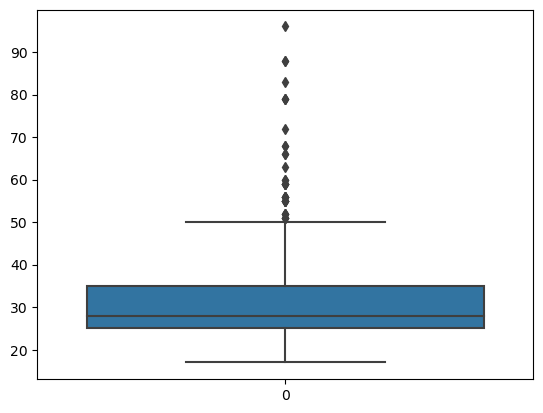

In [35]:
sns.boxplot(df['Length(ft)'])

In [36]:
df.drop(['Fuel gal/lbs','HP or lbs thr ea engine'],inplace=True,axis=1)

In [37]:
df.dtypes

Engine_Type              object
Max speed Knots           int64
Rcmnd cruise Knots        int64
Stall Knots dirty         int64
All eng rate of climb     int32
Eng out rate of climb     int64
Takeoff over 50ft         int64
Empty weight lbs          int32
Range N.M.                int32
Price                     int64
Wing_span(ft)             int32
Length(ft)                int32
dtype: object

In [38]:
df.describe()

,Max speed Knots,Rcmnd cruise Knots,Stall Knots dirty,All eng rate of climb,Eng out rate of climb,Takeoff over 50ft,Empty weight lbs,Range N.M.,Price,Wing_span(ft),Length(ft)
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,5.170000e+02,517.000000,517.000000
mean,214.226306,200.796905,60.800774,1665.746615,2065.119923,1743.292070,4381.897485,918.620890,2.355318e+06,38.932302,31.775629
std,113.880245,103.265122,16.411761,1257.339561,1120.683753,712.105782,5648.654127,695.407011,1.010173e+06,8.599692,11.744203
min,64.000000,70.000000,27.000000,360.000000,457.000000,500.000000,200.000000,117.000000,6.500000e+05,16.000000,17.000000
25%,143.000000,131.000000,50.000000,924.000000,1365.000000,1265.000000,1575.000000,517.000000,1.600000e+06,35.000000,25.000000
50%,181.000000,170.000000,57.000000,1200.000000,1769.000000,1565.000000,2295.000000,717.000000,2.000000e+06,36.000000,28.000000
75%,238.000000,229.000000,73.000000,1820.000000,2280.000000,2110.000000,5164.000000,1100.000000,2.940000e+06,42.000000,35.000000
max,755.000000,511.000000,115.000000,7220.000000,6400.000000,4850.000000,46800.000000,6500.000000,5.100000e+06,93.000000,96.000000


In [39]:
upper = df['Length(ft)'].mean() + 3*df['Length(ft)'].std()
lower =df['Length(ft)'].mean() -3 *df['Length(ft)'].std()
print(upper,lower)

67.0082376272886 -3.4569803739036864


In [42]:
out=['Max speed Knots','Rcmnd cruise Knots','Stall Knots dirty','All eng rate of climb','Eng out rate of climb','Takeoff over 50ft',
    'Empty weight lbs','Range N.M.','Price','Wing_span(ft)','Length(ft)']
for i in out:
    q25,q75=df[i].quantile([.25,.75])
    iqr=q75-q25
    minimum=q25-(iqr*1.5)
    maximum=q75+(iqr*1.5)

In [49]:
df[i].values[df[i] > maximum]

array([55, 55, 68, 68, 72, 55, 55, 55, 55, 51, 66, 66, 60, 56, 56, 56, 56,
       56, 51, 51, 51, 59, 59, 59, 59, 59, 96, 88, 88, 83, 79, 79, 79, 63,
       52, 52, 52, 60])

In [47]:
df[i].values[df[i] < minimum] 

array([], dtype=int32)

In [50]:
df.isnull().sum()

Engine_Type              0
Max speed Knots          0
Rcmnd cruise Knots       0
Stall Knots dirty        0
All eng rate of climb    0
Eng out rate of climb    0
Takeoff over 50ft        0
Empty weight lbs         0
Range N.M.               0
Price                    0
Wing_span(ft)            0
Length(ft)               0
dtype: int64

In [51]:
df.shape

(517, 12)

In [53]:
x=df.iloc[:,df.columns!='Engine_Type']
y =df['Engine_Type']

In [54]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score

In [55]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [56]:
model_rf=RandomForestClassifier(n_estimators=100)
model_rf.fit(x_train,y_train)

RandomForestClassifier()

In [57]:
pred=model_rf.predict(x_test)
accuracy_score(y_test,pred)

0.9807692307692307